# **Elon Musk**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import string
import spacy
from wordcloud import WordCloud,STOPWORDS

In [ ]:
df = pd.read_csv('/content/Elon_musk.csv',error_bad_lines = False, encoding = 'latin-1')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace = True)

In [ ]:
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
df = [y.strip() for y in df['Text']]
df

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [ ]:
len(df)

1999

In [ ]:
df = [Text for Text in df if Text]
df

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [ ]:
len(df)

1999

In [ ]:
text = ' '.join(df)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [ ]:
len(text)

158702

In [ ]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
text_tokens=tknzr.tokenize(text)
print(text_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [ ]:
len(text_tokens)

20832

In [ ]:
text_tokens_text=' '.join(text_tokens)
text_tokens_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [ ]:
no_punc_text = text_tokens_text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [ ]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

In [ ]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing',

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)


In [ ]:
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission', 'Once', 'predict', 'cash', 'flo

In [ ]:
len(no_stop_tokens)

11461

In [ ]:
# Normalize the data
lower_words = [Text.lower() for Text in no_stop_tokens]
print([lower_words[0:25]])

[['alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year']]


In [ ]:
# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'great', 'interview', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'inde', 'tweet', 'definit', 'repres', 'realworld']


In [ ]:
!python -m spacy download en

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-26 11:36:17.089902: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
#Lematization
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

alien Ray tracing Cyberpunk HDR nextlevel Have tried Great interview Doge underestimated Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox Frodo underdoge All thought would fail Himself Haha thanks Indeed Tweets definitely represent realworld


In [ ]:
lemmas = [token.lemma_ for token in doc]
lemmas

In [ ]:
clean_text=' '.join(lemmas)
clean_text

'alien Ray trace Cyberpunk HDR nextlevel have try great interview Doge underestimate Congratulations Tesla China amazing execution last year now next even Happy New Year Ox Frodo underdoge all thought would fail himself Haha thank indeed Tweets definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real Bought Dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet give private key avoid cost your app suck RT NASA select Falcon Heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink IPO Starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis ship this intend earth may idea apply Mars XPrize team manage

In [ ]:
len(lemmas)

11486

# **Feature Extraction**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [ ]:
X

<11486x3469 sparse matrix of type '<class 'numpy.int64'>'
	with 11116 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.vocabulary_

{'alien': 195,
 'ray': 2382,
 'trace': 3058,
 'cyberpunk': 772,
 'hdr': 1373,
 'nextlevel': 1986,
 'have': 1368,
 'try': 3091,
 'great': 1320,
 'interview': 1573,
 'doge': 897,
 'underestimate': 3227,
 'congratulations': 680,
 'tesla': 2963,
 'china': 587,
 'amazing': 219,
 'execution': 1068,
 'last': 1658,
 'year': 3448,
 'now': 2014,
 'next': 1985,
 'even': 1043,
 'happy': 1355,
 'new': 1983,
 'ox': 2114,
 'frodo': 1222,
 'underdoge': 3226,
 'all': 198,
 'thought': 3000,
 'would': 3434,
 'fail': 1103,
 'himself': 1415,
 'haha': 1344,
 'thank': 2974,
 'indeed': 1512,
 'tweets': 3109,
 'definitely': 810,
 'represent': 2449,
 'realworld': 2397,
 'time': 3017,
 'allocation': 200,
 'the': 2979,
 'entertaining': 1013,
 'outcome': 2093,
 'likely': 1714,
 'just': 1615,
 'send': 2594,
 'agree': 179,
 'clubhouse': 617,
 'it': 1592,
 'get': 1282,
 'real': 2392,
 'bought': 461,
 'dogecoin': 899,
 'lil': 1715,
 'toddler': 3028,
 'hodler': 1421,
 'he': 1374,
 'issue': 1591,
 'sentencing': 2599,
 '

In [ ]:
vectorizer.vocabulary_.keys()

In [ ]:
vectorizer.vocabulary_.values()

In [ ]:
vectorizer.vocabulary_.items()

In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

,alien,ray,trace,cyberpunk,hdr,nextlevel,have,try,great,interview,...,dire,priority,details,surreal,propaganda,social,click,samwise,gamgee,altho
0,195,2382,3058,772,1373,1986,1368,3091,1320,1573,...,869,2284,842,2892,2316,2722,609,2540,1255,210


In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

,0
alien,195
ray,2382
trace,3058
cyberpunk,772
hdr,1373
...,...
social,2722
click,609
samwise,2540
gamgee,1255


In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(by = 0, ascending=False)

,0
ðogecoin,3468
zone,3467
zon,3466
zip,3465
zeroes,3464
...,...
1000,4
100,3
10,2
005,1


In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(by = 0, ascending=True).head(20)

,0
000,0
005,1
10,2
100,3
1000,4
10000,5
107,6
10x,7
11,8
12,9


In [ ]:
vectorizer.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '005',
 '10',
 '100',
 '1000',
 '10000',
 '107',
 '10x',
 '11',
 '12',
 '122',
 '13',
 '130',
 '14',
 '140',
 '149',
 '15',
 '150',
 '155',
 '16',
 '162',
 '17',
 '18',
 '1880s',
 '1b',
 '1st',
 '20',
 '200',
 '2007',
 '2008',
 '2009',
 '2012',
 '2017',
 '2020',
 '2021',
 '2024',
 '2026',
 '2030',
 '20k',
 '210',
 '218',
 '21st',
 '22',
 '225',
 '23',
 '230',
 '24',
 '240',
 '25',
 '250',
 '250kw',
 '25gunsteslacom',
 '25k',
 '25th',
 '28',
 '28th',
 '29',
 '2k',
 '2nd',
 '2v',
 '30',
 '300',
 '301',
 '304',
 '304l',
 '31',
 '33',
 '330',
 '360',
 '37',
 '3800',
 '394',
 '39a',
 '3d',
 '3rd',
 '40',
 '400',
 '42',
 '420',
 '4227',
 '430',
 '43rd',
 '445',
 '448',
 '4530',
 '4680',
 '479000',
 '48',
 '4d',
 '4th',
 '50',
 '50000',
 '50k',
 '60',
 '60000',
 '65',
 '69420',
 '6f',
 '6k',
 '727',
 '74',
 '78',
 '7th',
 '90',
 '9007',
 '922',
 '948',
 '95',
 '99',
 'aber',
 'able',
 'abo',
 'aboard',
 'abort',
 'about',
 'above',
 'absence',
 'absolute',
 'absolutely',
 'absorb',
 

In [ ]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(X.toarray().shape)

(11486, 3469)


In [ ]:
print(X.toarray()[50:150])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# **Bigrams and trigrams**

In [ ]:
vectorizer_nigram_range = CountVectorizer(analyzer = 'word',
                                          ngram_range=(1,3),
                                          max_features=100) 
    
bow_matrix_ngram = vectorizer_nigram_range.fit_transform(lemmas)
bow_matrix_ngram

<11486x100 sparse matrix of type '<class 'numpy.int64'>'
	with 3272 stored elements in Compressed Sparse Row format>

In [ ]:
print(vectorizer_nigram_range.get_feature_names())

['actually', 'ai', 'also', 'back', 'big', 'booster', 'car', 'come', 'complete', 'cool', 'could', 'crew', 'day', 'design', 'do', 'dragon', 'earth', 'engine', 'even', 'ever', 'exactly', 'falcon', 'first', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'if', 'it', 'land', 'launch', 'life', 'like', 'look', 'lot', 'make', 'many', 'mars', 'maybe', 'mission', 'model', 'much', 'need', 'new', 'next', 'no', 'not', 'ok', 'one', 'part', 'people', 'point', 'pretty', 'probably', 'production', 'right', 'rocket', 'rt', 'say', 'seem', 'soon', 'space', 'spacex', 'starlink', 'starship', 'start', 'still', 'super', 'sure', 'take', 'tesla', 'test', 'thank', 'that', 'the', 'there', 'they', 'think', 'this', 'time', 'true', 'try', 'ufe0f', 'use', 'way', 'we', 'week', 'well', 'will', 'work', 'would', 'yeah', 'year', 'you']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# **TF-IDF vectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",
                                                 analyzer='word', 
                                                 ngram_range=(1,3), 
                                                 max_features = 10) 

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(lemmas)
tf_idf_matrix_n_gram_max_features

<11486x10 sparse matrix of type '<class 'numpy.float64'>'
	with 809 stored elements in Compressed Sparse Row format>

In [ ]:
print(vectorizer_n_gram_max_features.get_feature_names())

['good', 'great', 'it', 'launch', 'make', 'rt', 'tesla', 'the', 'this', 'we']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
pd.DataFrame(tf_idf_matrix_n_gram_max_features.toarray(),
             columns = vectorizer_n_gram_max_features.get_feature_names())

,good,great,it,launch,make,rt,tesla,the,this,we
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
11481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Generate WordCloud**

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
  
    # Set figure size
    plt.figure(figsize=(40, 30))

    # Display image
    plt.imshow(wordcloud) 
    
    # No axis details
    plt.axis("off");

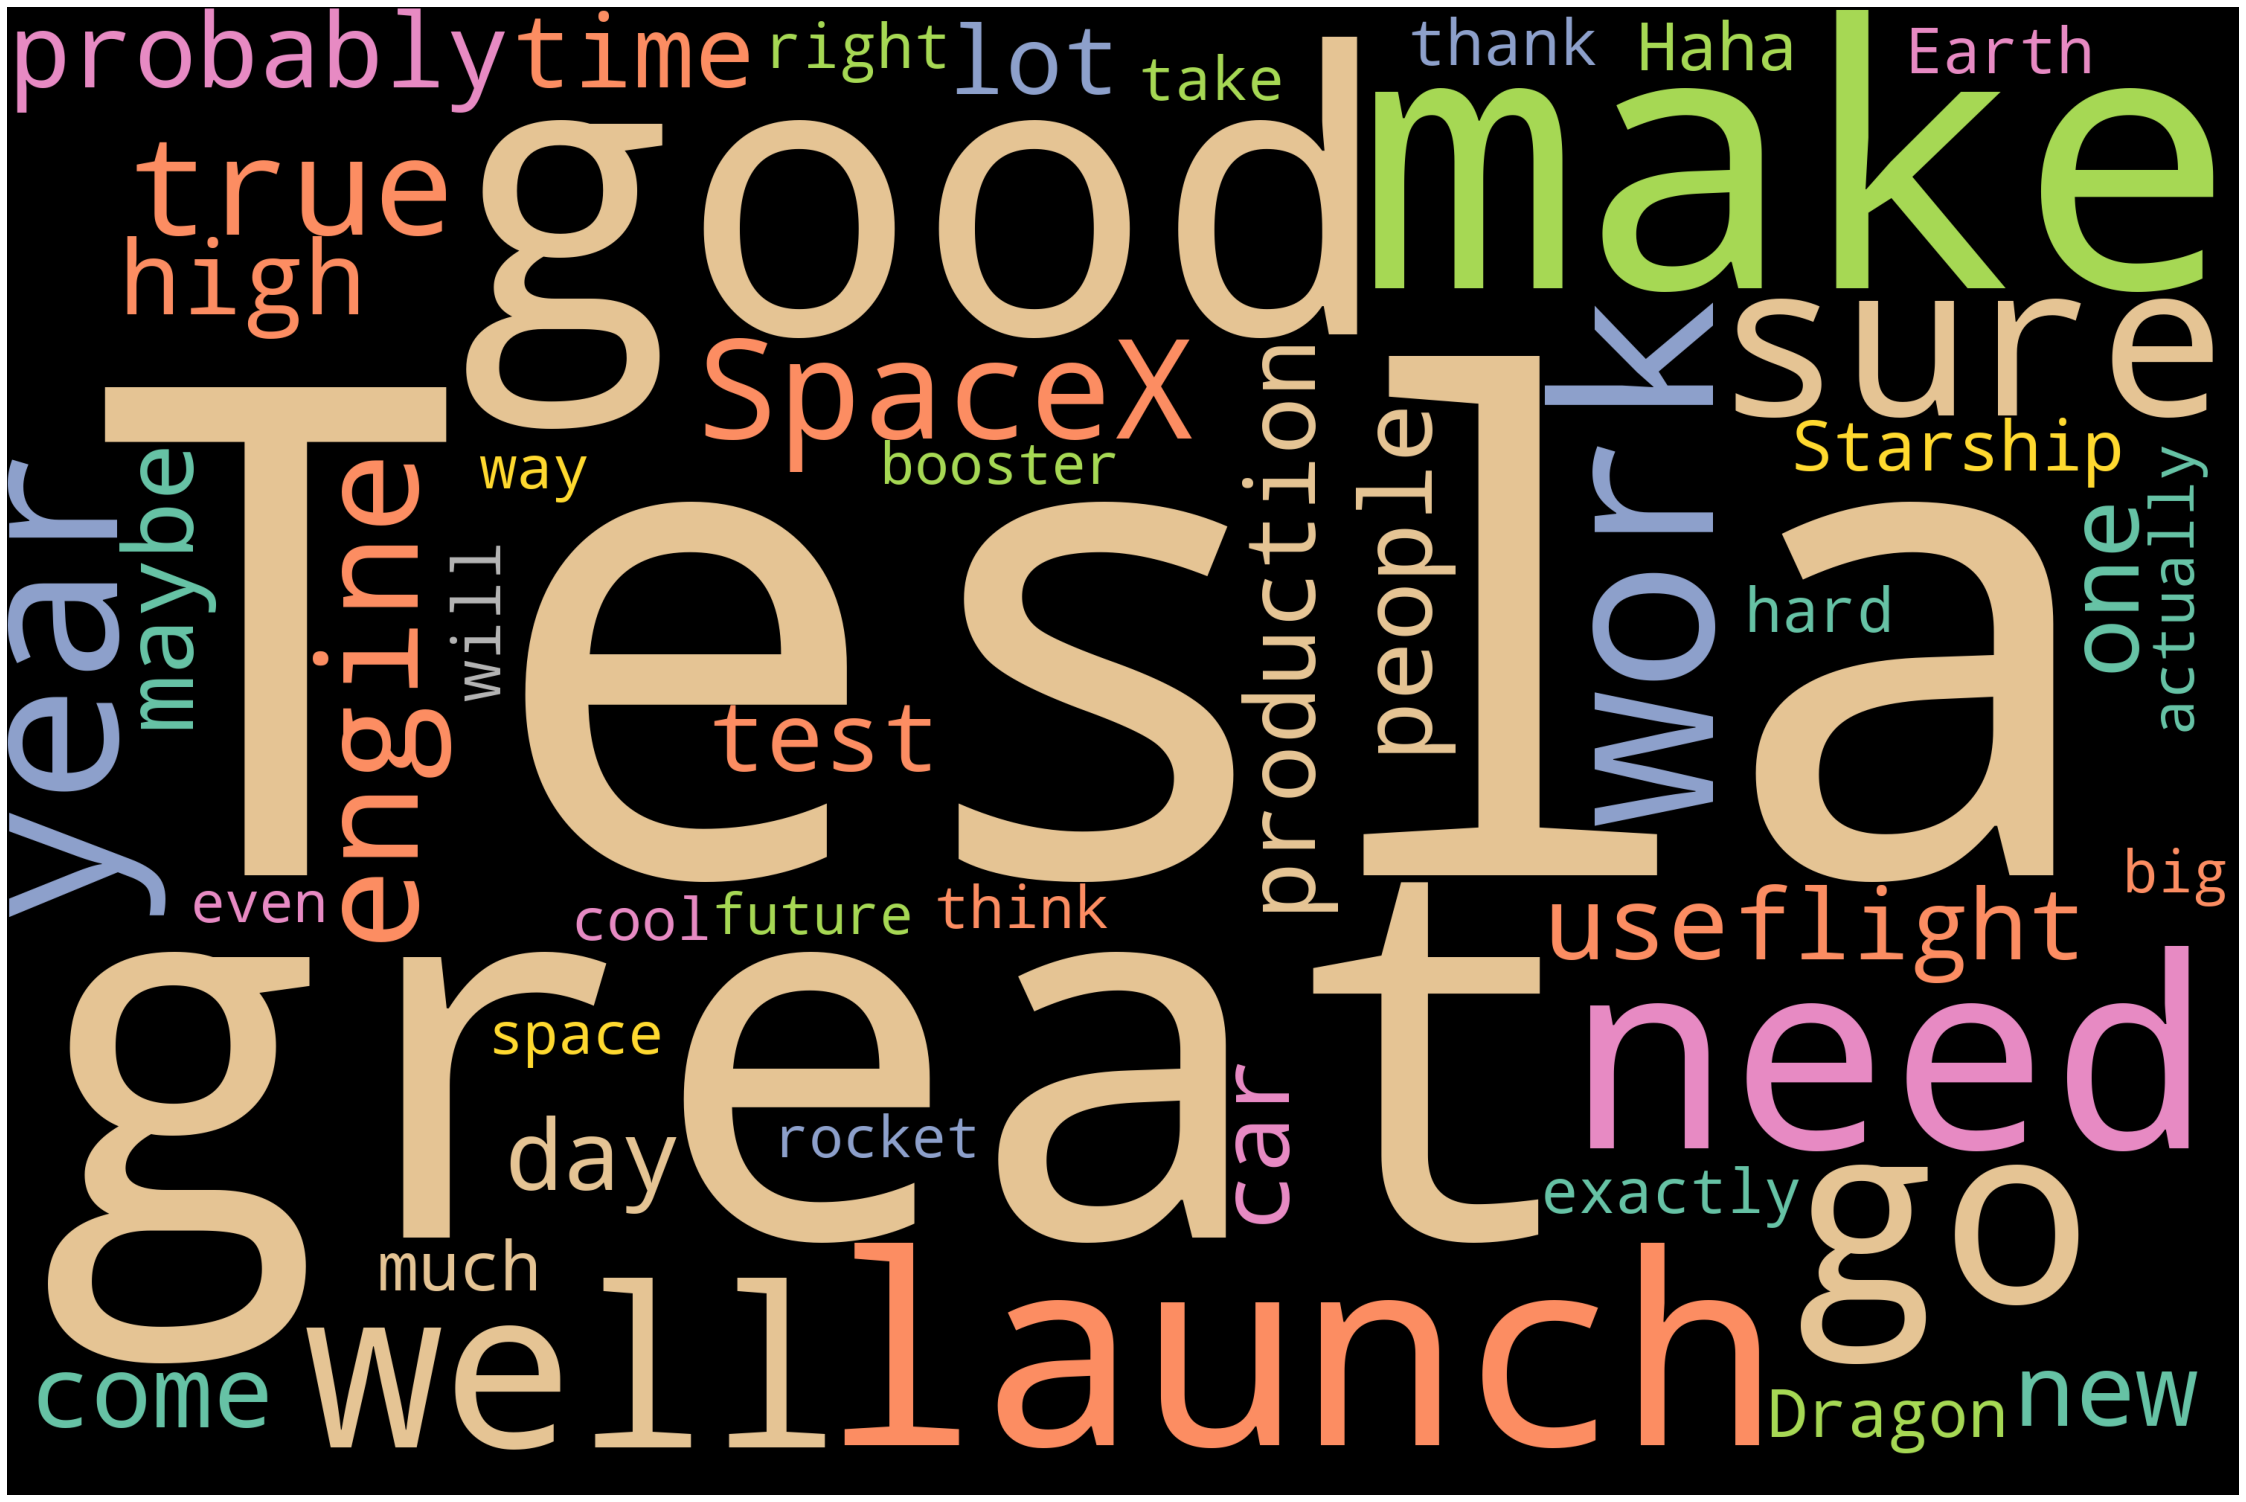

In [ ]:
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,
                    height=2000,
                    background_color='black',
                    max_words=50,
                   colormap='Set2',
                    stopwords=STOPWORDS).generate(clean_text)
plot_cloud(wordcloud)

# **Named Entity Recogination**

In [ ]:
nlp = spacy.load('en_core_web_sm')
one_block = clean_text
one_block

'alien Ray trace Cyberpunk HDR nextlevel have try great interview Doge underestimate Congratulations Tesla China amazing execution last year now next even Happy New Year Ox Frodo underdoge all thought would fail himself Haha thank indeed Tweets definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real Bought Dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet give private key avoid cost your app suck RT NASA select Falcon Heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink IPO Starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis ship this intend earth may idea apply Mars XPrize team manage

In [ ]:
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style = 'ent', jupyter = True)

In [ ]:
#POS Tagging
for token in doc_block[:]:
  print(token, token.pos_)

Streaming output truncated to the last 5000 lines.
generator NOUN
all DET
we PRON
broad ADJ
review NOUN
launch NOUN
site NOUN
propulsion NOUN
structure NOUN
av INTJ
exactly ADV
we PRON
need AUX
make VERB
lot NOUN
improvement NOUN
chance NOUN
complete VERB
48 NUM
launch NOUN
next ADJ
year NOUN
agree VERB
Lex PROPN
Glad PROPN
ok INTJ
Haha INTJ
thank VERB
wait VERB
next ADJ
year NOUN
sure ADV
Great PROPN
Browns PROPN
average ADJ
latency NOUN
improve VERB
sit VERB
Very ADV
Starlink PROPN
design NOUN
probably ADV
5 NUM
6 NUM
optimize NOUN
tanker NOUN
Starlink PROPN
revolution PROPN
connectivity NOUN
esp ADJ
yeah INTJ
great ADJ
letter NOUN
it PRON
increasingl VERB
the DET
ship NOUN
ring NOUN
thick ADV
need VERB
it PRON
nextlevel VERB
U0001F4B0 PROPN
U0001F4A9 PROPN
Glad PROPN
hear VERB
Mom PROPN
ok INTJ
Good PROPN
see VERB
inspiring VERB
future ADJ
space NOUN
the DET
new ADJ
heat NOUN
pump VERB
Model PROPN
Y PROPN
come VERB
soon ADV
great ADJ
render VERB
the DET
circumferentia NOUN
that PRON

In [ ]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

nouns_verbs

['trace',
 'nextlevel',
 'try',
 'interview',
 'execution',
 'year',
 'underdoge',
 'thought',
 'fail',
 'thank',
 'represent',
 'time',
 'allocation',
 'outcome',
 'send',
 'agree',
 'clubhouse',
 'get',
 'toddler',
 'hodler',
 'issue',
 'sentencing',
 'seem',
 'thank',
 'fix',
 'unlock',
 'account',
 'power',
 'crypto',
 'wallet',
 'give',
 'avoid',
 'cost',
 'app',
 'suck',
 'select',
 'launch',
 'gateway',
 'mission',
 'predict',
 'cash',
 'flow',
 'starlink',
 'endeavor',
 'pass',
 'chasm',
 'cash',
 'flow',
 'year',
 'cost',
 'ton',
 'carbon',
 'sequester',
 'value',
 'product',
 'make',
 'scalable',
 'g',
 'mean',
 'price',
 'country',
 'difference',
 'ship',
 'intend',
 'earth',
 'idea',
 'apply',
 'team',
 'manage',
 'carbon',
 'capture',
 'prize',
 'receive',
 'stock',
 'comp',
 'stock',
 'option',
 'take',
 'table',
 'miss',
 'work',
 'go',
 'seem',
 'bit',
 'appear',
 'fix',
 'coin',
 'unit',
 'time',
 'launch',
 'tower',
 'stack',
 'orbit',
 'booster',
 'improve',
 'ship',

In [ ]:
len(nouns_verbs)

5018

In [ ]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
X

<5018x1765 sparse matrix of type '<class 'numpy.int64'>'
	with 4965 stored elements in Compressed Sparse Row format>

In [ ]:
X.shape

(5018, 1765)

In [ ]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
temp_df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
temp_df

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10x,1st,20k,21st,25k,25th,28th,39a,abo,absence,...,worry,worth,wow,write,writer,writing,year,yesterday,yup,zeroes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv.vocabulary_

{'trace': 1600,
 'nextlevel': 1013,
 'try': 1625,
 'interview': 798,
 'execution': 534,
 'year': 1761,
 'underdoge': 1663,
 'thought': 1567,
 'fail': 554,
 'thank': 1560,
 'represent': 1268,
 'time': 1576,
 'allocation': 56,
 'outcome': 1058,
 'send': 1363,
 'agree': 48,
 'clubhouse': 272,
 'get': 650,
 'toddler': 1583,
 'hodler': 721,
 'issue': 808,
 'sentencing': 1367,
 'seem': 1359,
 'fix': 590,
 'unlock': 1671,
 'account': 22,
 'power': 1156,
 'crypto': 366,
 'wallet': 1710,
 'give': 654,
 'avoid': 122,
 'cost': 344,
 'app': 74,
 'suck': 1499,
 'select': 1360,
 'launch': 845,
 'gateway': 643,
 'mission': 975,
 'predict': 1161,
 'cash': 231,
 'flow': 598,
 'starlink': 1463,
 'endeavor': 509,
 'pass': 1090,
 'chasm': 250,
 'ton': 1586,
 'carbon': 223,
 'sequester': 1372,
 'value': 1686,
 'product': 1184,
 'make': 916,
 'scalable': 1337,
 'mean': 942,
 'price': 1170,
 'country': 349,
 'difference': 433,
 'ship': 1390,
 'intend': 790,
 'earth': 487,
 'idea': 755,
 'apply': 77,
 'team':

In [ ]:
sum_words = X.sum(axis = 0) #column total
sum_words

matrix([[2, 1, 1, ..., 4, 1, 1]])

In [ ]:
type(sum_words)

numpy.matrix

In [ ]:
sorted(cv.vocabulary_)

['10x',
 '1st',
 '20k',
 '21st',
 '25k',
 '25th',
 '28th',
 '39a',
 'abo',
 'absence',
 'absorb',
 'absorption',
 'absurd',
 'academia',
 'accel',
 'accelera',
 'accelerate',
 'accelerator',
 'accept',
 'access',
 'accidental',
 'accommodate',
 'account',
 'accura',
 'accuracy',
 'ace',
 'achieve',
 'achievement',
 'action',
 'activity',
 'actuary',
 'add',
 'address',
 'administer',
 'adult',
 'advance',
 'advanced',
 'advantage',
 'adventure',
 'advertise',
 'advice',
 'advise',
 'aero',
 'affair',
 'affect',
 'afternoon',
 'age',
 'agony',
 'agree',
 'aim',
 'air',
 'aircraft',
 'airplane',
 'aliens',
 'align',
 'allocati',
 'allocation',
 'allow',
 'alloy',
 'alpha',
 'altit',
 'altitude',
 'aluminum',
 'amaze',
 'amount',
 'amplification',
 'amplitude',
 'analog',
 'analysis',
 'angle',
 'anode',
 'answer',
 'antenna',
 'apogee',
 'app',
 'appeal',
 'appear',
 'apply',
 'appreciate',
 'appreciated',
 'approach',
 'approval',
 'approve',
 'approximation',
 'arbeiten',
 'architectur

In [ ]:
wf_df = pd.DataFrame({'word':cv.get_feature_names_out(),
                      'count':np.array(sum_words).flatten()}) 
wf_df

,word,count
0,10x,2
1,1st,1
2,20k,1
3,21st,1
4,25k,1
...,...,...
1760,writing,1
1761,year,48
1762,yesterday,4
1763,yup,1


In [ ]:
wf_df.sort_values(by = 'count',
                  ascending=False,
                  inplace = True,
                  ignore_index = True)
wf_df

,word,count
0,make,62
1,launch,57
2,year,48
3,work,45
4,go,44
...,...,...
1760,honey,1
1761,homicide,1
1762,homework,1
1763,homeland,1


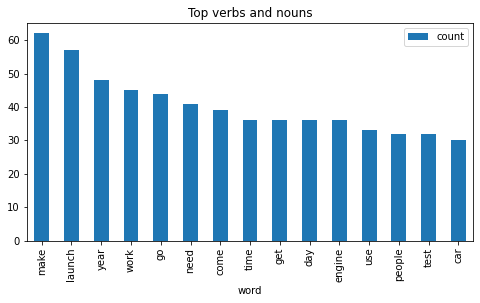

In [ ]:
wf_df[0:15].plot.bar(x='word', figsize = (8,4), title = 'Top verbs and nouns')

# **Emotion Mining**

In [ ]:
afinn = pd.read_csv('/content/Afinn.csv',error_bad_lines = False, sep = ",",encoding = 'latin-1')
afinn

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [ ]:
afinn[1500:]

,word,value
1500,masterpieces,4
1501,matter,1
1502,matters,1
1503,mature,2
1504,meaningful,2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk import tokenize

sentences = tokenize.sent_tokenize(" ".join(df))

sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [ ]:
sent_df = pd.DataFrame(sentences, columns = ['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [ ]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
  sent_score = 0
  if text:
    sentence = nlp(text)
    #print(sentence)
    for word in sentence:
      sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
  return sent_score

In [ ]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [ ]:
sent_df

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0
920,"It may never pay out, as the stock cant b ht...",-4
921,Details Aug 28.,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [ ]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [ ]:
sent_df.sort_values(by='sentiment_value').head()

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
837,Cool Model 3 review by @iamjamiefoxx https://t...,-6,61
680,"Occasional flights from land are ok, but frequ...",-4,39
886,This is primarily an electrical/electronic (ch...,-4,69


In [ ]:
sent_df.sort_values(by='sentiment_value').tail()

,sentence,sentiment_value,word_count
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
719,We just havent observed the https://t.co/mez...,15,72
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94


In [ ]:
sent_df['sentiment_value'].describe()

count    924.00000
mean       1.37013
std        2.67799
min       -8.00000
25%        0.00000
50%        0.00000
75%        3.00000
max       16.00000
Name: sentiment_value, dtype: float64

In [ ]:
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14


In [ ]:
sent_df[sent_df['sentiment_value']<-5]

,sentence,sentiment_value,word_count
64,"Also, the road to hell is mostly paved with ba...",-7,11
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
837,Cool Model 3 review by @iamjamiefoxx https://t...,-6,61


In [ ]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence']

64     Also, the road to hell is mostly paved with ba...
647    Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...
837    Cool Model 3 review by @iamjamiefoxx https://t...
Name: sentence, dtype: object

In [ ]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()

['Also, the road to hell is mostly paved with bad intentions.',
 'Very ba\x85 https://t.co/tJsh1Exz1Q @justpaulinelol It\x92s too embarrassing Just learned that my physics prof from Penn is head of Fermilab &amp; still has some of my old homework <U+263A><U+FE0F> @ruskin147 It is unfortunately common for many in academia to overweight the value of ideas &amp; underweight bringing\x85 https://t.co/OFFoojCqNv @l_vaux @kulpability @tlowdon @EthicalSkeptic People are extremely unlikely to die of Covid/sars-cov2 alone.',
 'Cool Model 3 review by @iamjamiefoxx https://t.co/hJDD7BjkE3 @teslacn Tesla will add a power lift gate at no cost @HansNoordsij Agreed, hydrogen fool sells make no sense Pronouns suck @historyofarmani Also, we get our lithium from Australia @nichegamer <U+0001F923><U+0001F923> @akinfermo Yeah, would have been way better just to send everyone $6k I bet no one on <U+0001F339> Twitter even *has* a guillotine!']

In [ ]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'Also, the road to hell is mostly paved with bad intentions.'

In [ ]:
sent_df['index'] = range(0, len(sent_df))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


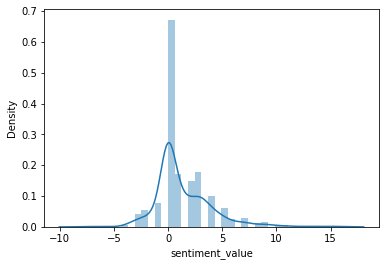

In [ ]:
sns.distplot(sent_df['sentiment_value'])

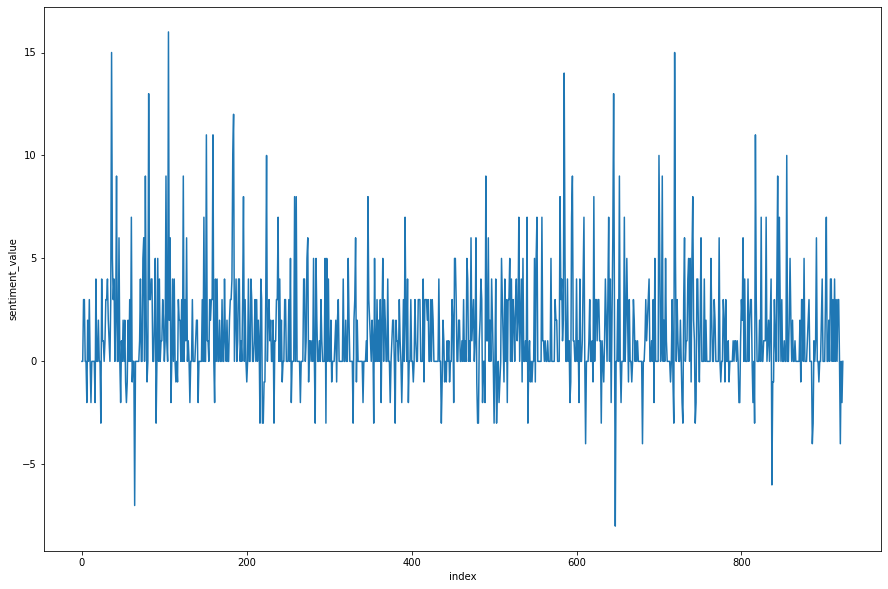

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

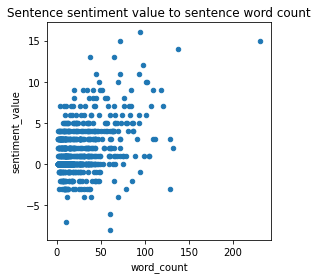

In [ ]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(4,4),
                     title='Sentence sentiment value to sentence word count')